### 相关性分析

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import os
from tqdm import tqdm

import warnings

import matplotlib.pyplot as plt

from datetime import datetime as dt

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_hdf('C:/Users/f3107/Desktop/hy_data/train_002.h5')

In [3]:
train.head()

,ship,x,y,v,d,datetime,type,t,d_d
0,0,6.118352e+06,5.130672e+06,0.0,0,1900-11-07 12:09:28,拖网,00:00:00,0.0
1,0,6.118352e+06,5.130672e+06,0.0,0,1900-11-07 12:18:30,拖网,00:09:02,0.0
2,0,6.118352e+06,5.130672e+06,0.0,0,1900-11-07 12:28:32,拖网,00:19:04,0.0
3,0,6.118352e+06,5.130672e+06,0.0,0,1900-11-07 12:38:32,拖网,00:29:04,0.0
4,0,6.118352e+06,5.130672e+06,0.0,0,1900-11-07 12:48:30,拖网,00:39:02,0.0


In [4]:
def delta(df):
    
    # 生成时间间隔 d_t
    df['t'] = df['t'].dt.total_seconds().astype('int')
    
    df['d_t'] = df['t'].diff()
    df.loc[0,'d_t'] = 0
    df['d_t'] = df['d_t'].astype('int')

    # 生成d_x, d_y
    df['d_x'] = df['x'].diff()
    df.loc[0,'d_x'] = 0
    df['v_x'] = df['d_x']/df['d_t']
    df.loc[0,'v_x'] = 0

    df['d_y'] = df['y'].diff()
    df.loc[0,'d_y'] = 0
    df['v_y'] = df['d_y']/df['d_t']
    df.loc[0,'v_y'] = 0
    
    return df

In [5]:
train = delta(train)

In [6]:
train.head()

,ship,x,y,v,d,datetime,type,t,d_d,d_t,d_x,v_x,d_y,v_y
0,0,6.118352e+06,5.130672e+06,0.0,0,1900-11-07 12:09:28,拖网,0,0.0,0,0.0,0.0,0.0,0.0
1,0,6.118352e+06,5.130672e+06,0.0,0,1900-11-07 12:18:30,拖网,542,0.0,542,0.0,0.0,0.0,0.0
2,0,6.118352e+06,5.130672e+06,0.0,0,1900-11-07 12:28:32,拖网,1144,0.0,602,0.0,0.0,0.0,0.0
3,0,6.118352e+06,5.130672e+06,0.0,0,1900-11-07 12:38:32,拖网,1744,0.0,600,0.0,0.0,0.0,0.0
4,0,6.118352e+06,5.130672e+06,0.0,0,1900-11-07 12:48:30,拖网,2342,0.0,598,0.0,0.0,0.0,0.0


In [7]:
train_label = train.drop_duplicates('ship').loc[:,['ship','type']]
#test_label = test.drop_duplicates('ship').loc[:,'ship']

### 整体相关性

#### v, d

In [8]:
def vd_correlation(train, train_label):
    corr = train[['v','d']].groupby(train['ship']).corr()
    corr = corr.unstack()
    c = corr['v']['d'].reset_index()
    c.rename(columns={'d':'vd_corr'},inplace=True)
    #c = c.fillna(-99)
    
    train_label = pd.merge(train_label, c, on = 'ship')
    
    return train_label

In [9]:
train_label = vd_correlation(train, train_label)

In [10]:
train_label_tuo = train_label[train_label['type'] == '拖网']
train_label_wei = train_label[train_label['type'] == '围网']
train_label_ci = train_label[train_label['type'] == '刺网']

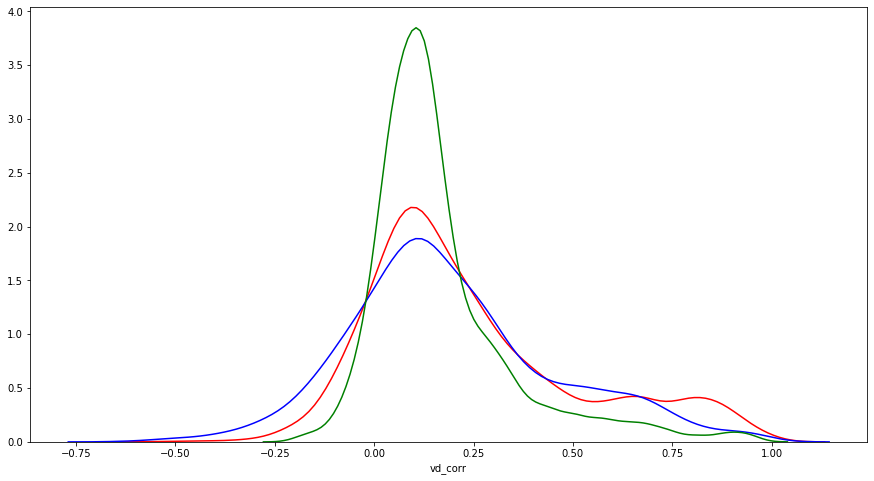

In [11]:
plt.figure(figsize=(15,8))

sns.distplot(train_label_tuo['vd_corr'], hist = False, color= 'red')
sns.distplot(train_label_wei['vd_corr'], hist = False, color= 'blue')
sns.distplot(train_label_ci['vd_corr'], hist = False, color= 'green')

#### x,y

In [12]:
def xy_correlation(train, train_label):
    corr = train[['x','y']].groupby(train['ship']).corr()
    corr = corr.unstack()
    c = corr['x']['y'].reset_index()
    c.rename(columns={'y':'xy_corr'},inplace=True)
    #c = c.fillna(-99)
    
    train_label = pd.merge(train_label, c, on = 'ship')
    
    return train_label

In [13]:
train_label_tuo['xy_corr'] = xy_correlation(train, train_label)

In [17]:
train_label_tuo = train_label[train_label['type'] == '拖网']
train_label_wei = train_label[train_label['type'] == '围网']
train_label_ci = train_label[train_label['type'] == '刺网']

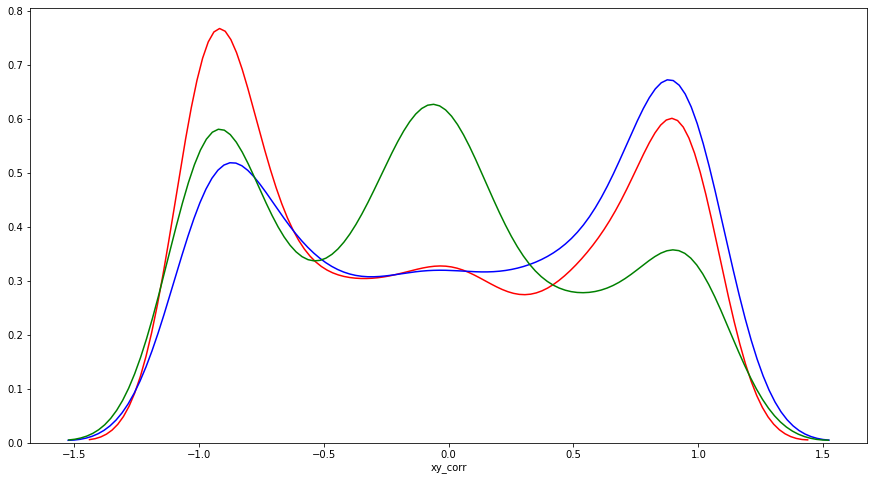

In [18]:
plt.figure(figsize=(15,8))

sns.distplot(train_label_tuo['xy_corr'], hist = False, color= 'red')
sns.distplot(train_label_wei['xy_corr'], hist = False, color= 'blue')
sns.distplot(train_label_ci['xy_corr'], hist = False, color= 'green')